## PRODUCER PRICE INDEX TIMER SERIES ANALYSIS PROJECT

### DATA EXPLORATION AND PREPROCESSING

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
df = pd.read_csv('ppi.csv',parse_dates =['yearqrt','t'])
df.head()

,yearqrt,m3,ppi,cpi,gdp,m1nsa,ddnsa,t,lnppi,dppi,dlnppi,lppi,trend
0,1960-01-01,692.00000,25.400000,19.280001,2391.0000,140.53000,111.67,1960-04-01,3.234749,NaN,NaN,NaN,1
1,1960-04-01,701.59998,25.440001,19.400000,2379.2000,138.42999,109.47,1960-07-01,3.236323,0.040001,0.001574,25.400000,2
2,1960-07-01,709.50000,25.370001,19.450001,2383.6001,139.60001,110.33,1960-10-01,3.233567,-0.070000,-0.002755,25.440001,3
3,1960-10-01,722.09998,25.400000,19.559999,2352.8999,142.67999,113.23,1961-01-01,3.234749,0.029999,0.001182,25.370001,4
4,1961-01-01,726.20001,25.490000,19.570000,2366.5000,142.22000,113.40,1961-04-01,3.238286,0.090000,0.003537,25.400000,5


In [3]:
#checking size
df.shape

(169, 13)

In [4]:
# column names
df.columns

Index(['yearqrt', 'm3', 'ppi', 'cpi', 'gdp', 'm1nsa', 'ddnsa', 't', 'lnppi',
       'dppi', 'dlnppi', 'lppi', 'trend'],
      dtype='object')

In [5]:
# datatypes of the columns
df.dtypes

yearqrt    datetime64[ns]
m3                float64
ppi               float64
cpi               float64
gdp               float64
m1nsa             float64
ddnsa             float64
t          datetime64[ns]
lnppi             float64
dppi              float64
dlnppi            float64
lppi              float64
trend               int64
dtype: object

In [6]:
# checking for nulls
df.isnull().sum()

yearqrt    0
m3         0
ppi        0
cpi        0
gdp        0
m1nsa      0
ddnsa      0
t          0
lnppi      0
dppi       1
dlnppi     1
lppi       1
trend      0
dtype: int64

In [7]:
# checking for duplicates
df.duplicated().sum()

0

### EDA

In [8]:
def histplot(df,col1,c):
    plt.figure(figsize=(10,5))
    sns.histplot(x = df[col1],kde=True,color=c)
    plt.title(f'{col1} Distribution')

In [9]:
def boxplot(df,col1,color):
    plt.figure(figsize=(8,5))
    sns.boxplot(x = df[col1],palette=color)
    plt.title(f'{col1} Distribution')

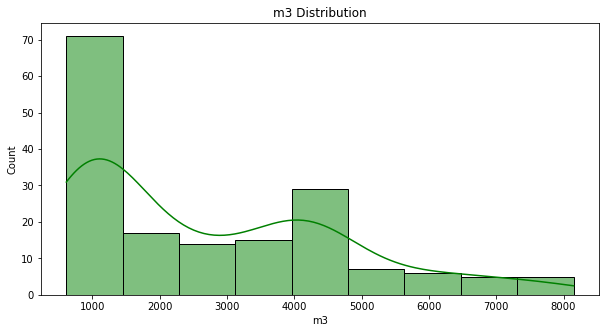

In [10]:
histplot(df,'m3','g')

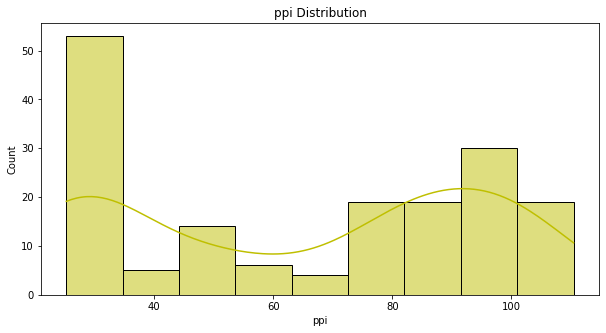

In [11]:
histplot(df,'ppi','y')

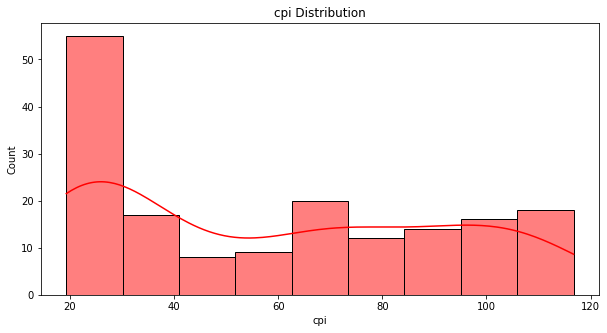

In [12]:
histplot(df,'cpi','r')

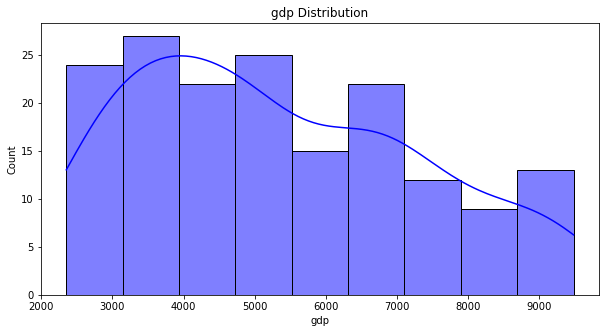

In [13]:
histplot(df,'gdp','b')

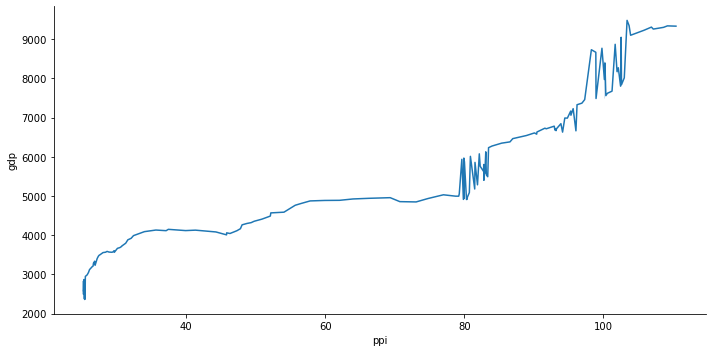

In [14]:
sns.relplot(data=df,x='ppi',y='gdp',kind = 'line',aspect=2)

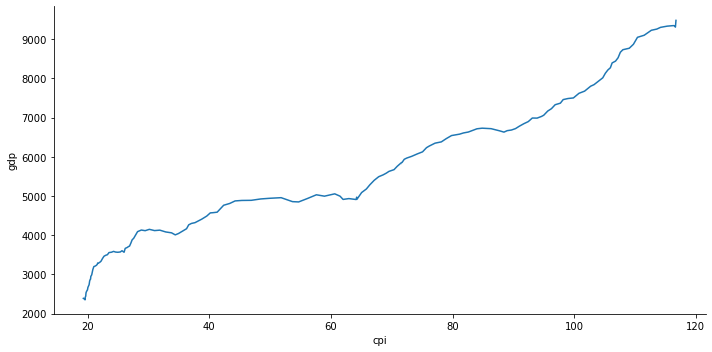

In [15]:
sns.relplot(data=df,x='cpi',y='gdp',kind = 'line',aspect=2)

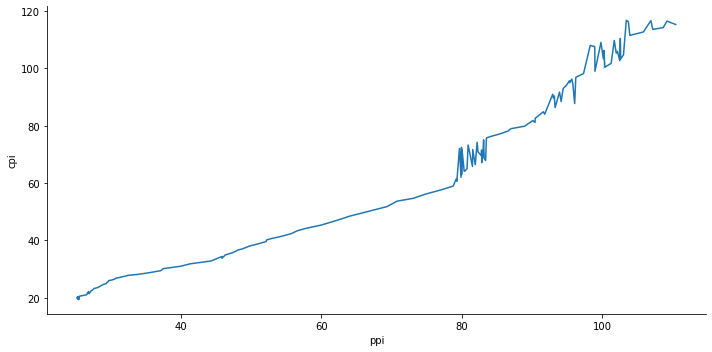

In [16]:
sns.relplot(data=df,x='ppi',y='cpi',kind = 'line',aspect=2)

### COMPONENTS OF THE TIME 

In [17]:
df = df.set_index('yearqrt')

In [18]:
ts_comp=seasonal_decompose(df.ppi,period=4)

In [19]:
d_trend=ts_comp.trend
d_seasonal=ts_comp.seasonal
d_residual=ts_comp.resid

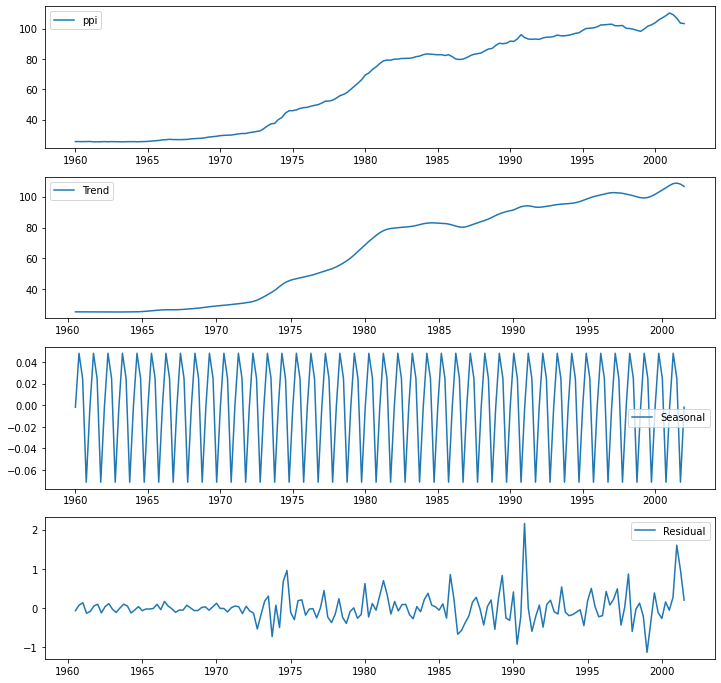

In [20]:
_,ax=plt.subplots(4,1,figsize=(12,12))
plt.subplot(411)
plt.plot(df.ppi,label="ppi")
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend()
plt.show()

In [21]:
ppi = df.ppi

In [22]:
def tripleSmoothing(data,alpha,beta,gamma,period=4,trend='multiplicative',seasonal='additive'):
    model=ExponentialSmoothing(data,trend=trend,seasonal_periods=period,seasonal=seasonal).fit(smoothing_level=alpha,smoothing_slope=beta,
                                                                          smoothing_seasonal=gamma)
    fcast=model.fittedvalues
    MSE=round(mean_squared_error(data,fcast),3)
    return MSE,fcast

In [23]:
alpha=[0.1,0.13,0.15]
beta=[0.2,0.4,0.17]
gamma=[0.1,0.36,0.4]
x=[]
y=[]
z=[]
mse=[]
for i in range(len(alpha)):
    for j in range(len(beta)):
        for k in range(len(gamma)):
            x.append(alpha[i])
            y.append(beta[j])
            z.append(gamma[k])
            error=tripleSmoothing(ppi,alpha=alpha[i],beta=beta[j],gamma=gamma[k])[0]
            mse.append(error)

In [24]:
param_df=pd.DataFrame(list(zip(x,y,z,mse)),columns=['Alpha','Beta','Gamma','MSE'])

In [25]:
param_df.sort_values(by='MSE',ascending=True)

,Alpha,Beta,Gamma,MSE
23,0.15,0.40,0.40,4.808
20,0.15,0.20,0.40,4.958
22,0.15,0.40,0.36,4.981
26,0.15,0.17,0.40,5.023
19,0.15,0.20,0.36,5.143
25,0.15,0.17,0.36,5.174
14,0.13,0.40,0.40,5.406
11,0.13,0.20,0.40,5.535
17,0.13,0.17,0.40,5.601
13,0.13,0.40,0.36,5.618


In [26]:
ppi_smooth = tripleSmoothing(ppi,alpha=0.15,beta=0.40,gamma=0.40)[1]

#### CHECKING STATIONARITY

In [27]:
def stationarity(data):
    pvalue=adfuller(data)[1]
    if pvalue < 0.05:
        msg="Data is Stationary, Proceed to model building."
    else:
        msg="Data is not Stationary.Difference the data before model building."
    return(msg)

In [28]:
stationarity(ppi_smooth)

'Data is not Stationary.Difference the data before model building.'

In [29]:
# differencing
diff_ppi = ppi_smooth - ppi_smooth.shift()
diff_ppi.dropna(inplace = True)

In [30]:
stationarity(diff_ppi)

'Data is Stationary, Proceed to model building.'

### ARIMA

In [31]:
#splitting the data
ss = int(0.70 * len(ppi_smooth))

train = ppi_smooth.iloc[:ss]
test = ppi_smooth.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 118, test = 51


#### ACF / PACF FOR ARIMA

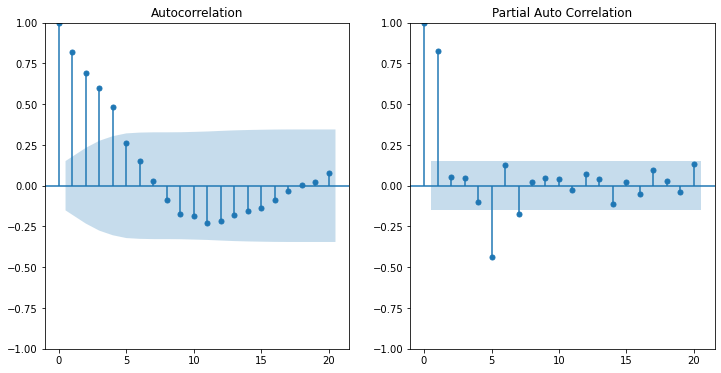

In [32]:
ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(diff_ppi, lags=20, ax=ax[0]);
plt.title("Auto Correlation")

plot_pacf(diff_ppi, lags=20, ax=ax[1]);
plt.title("Partial Auto Correlation")

plt.show()

In [33]:
#p = [0 - 6]
#q = [0 - 5]

#### HYPERPARAMETERS TUNING FOR ARIMA

In [34]:
p_val = []
q_val = []
aic_val = []
bic_val = []
mse_val = []
rmse_val = []
def ARMA_checkmodel(p,q):
    p_val.append(p)
    q_val.append(q)
    model = ARIMA(train,order=(p,1,q)).fit()
    aic,bic = model.aic, model.bic
    aic_val.append(aic)
    bic_val.append(bic)
    predictions = model.predict(0,len(test)-1)
    actual = []; pred = []
    for i in range(len(predictions)):
        actual.append(test[i])
        pred.append(predictions[i])
    df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
    mse = mean_squared_error(df_res.actual,df_res.predicted)
    rmse = np.sqrt(mse)
    mse_val.append(mse)
    rmse_val.append(rmse)
    

In [35]:
p = [0,1,2,3,4,5,6]
q = [0,1,2,3,4,5]

In [36]:
for i in p:
    for j in q:
        ARMA_checkmodel(i,j)

In [37]:
df_eval = pd.DataFrame({'p':p_val,'q':q_val,'rmse':rmse_val})
df_eval.sort_values(by='rmse',ascending=True)

,p,q,rmse
26,4,2,72.904633
15,2,3,72.904682
25,4,1,72.904787
20,3,2,72.904794
19,3,1,72.904913
14,2,2,72.904926
13,2,1,72.905006
41,6,5,72.905275
17,2,5,72.905488
24,4,0,72.905854


In [38]:
p=4; q=2
m1 = ARIMA(train,order=(p,1,q)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  118
Model:                 ARIMA(4, 1, 2)   Log Likelihood                 -52.361
Date:                Tue, 11 Oct 2022   AIC                            118.723
Time:                        11:30:32   BIC                            138.058
Sample:                    01-01-1960   HQIC                           126.572
                         - 04-01-1989                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2793      0.357     -0.782      0.434      -0.979       0.421
ar.L2          0.6700      0.154      4.358      0.000       0.369       0.971
ar.L3          0.2992      0.320      0.935      0.350      -0.328       0.927
ar.L4          0.1346      0.127      1.060      0.289      -0.114       0.383
ma.L1          1.2365      0.373      3.312      0.001       0.505       1.968
ma.L2          0.5162      0.303      1.706      0.088      -0.077       1.109
sigma2         0.1401      0.013     10.619      0.000       0.114       0.166
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                23.14
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              25.91   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
#predictions
predictions1 = m1.predict(0,len(test)-1)
print(predictions1)

1960-01-01     0.000000
1960-04-01    25.463360
1960-07-01    25.286423
1960-10-01    25.363194
1961-01-01    25.391064
1961-04-01    25.341074
1961-07-01    25.388693
1961-10-01    25.249521
1962-01-01    25.316376
1962-04-01    25.357078
1962-07-01    25.084376
1962-10-01    25.233028
1963-01-01    25.373667
1963-04-01    25.462638
1963-07-01    25.148819
1963-10-01    25.323492
1964-01-01    25.371627
1964-04-01    25.262316
1964-07-01    25.284552
1964-10-01    25.359668
1965-01-01    25.420659
1965-04-01    25.371825
1965-07-01    25.317776
1965-10-01    25.660105
1966-01-01    25.893782
1966-04-01    26.029990
1966-07-01    26.472003
1966-10-01    26.714878
1967-01-01    27.044137
1967-04-01    27.352945
1967-07-01    27.249578
1967-10-01    27.426016
1968-01-01    27.106418
1968-04-01    27.200612
1968-07-01    27.344933
1968-10-01    27.485229
1969-01-01    27.572402
1969-04-01    27.905174
1969-07-01    28.152974
1969-10-01    28.346140
1970-01-01    28.714138
1970-04-01    29

In [40]:
actual = []; pred = []

for i in range(len(predictions1)):
    actual.append(test[i])
    pred.append(predictions1[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

        actual  predicted        err
0    89.771454   0.000000  89.771454
1    90.783802  25.463360  65.320442
2    92.265886  25.286423  66.979463
3    93.605236  25.363194  68.242042
4    93.701501  25.391064  68.310437
5    94.143916  25.341074  68.802842
6    95.849245  25.388693  70.460552
7    96.260047  25.249521  71.010526
8    96.636093  25.316376  71.319717
9    97.150628  25.357078  71.793550
10   95.781508  25.084376  70.697132
11   94.672108  25.233028  69.439080
12   94.503779  25.373667  69.130112
13   94.924428  25.462638  69.461790
14   94.278362  25.148819  69.129543
15   94.454783  25.323492  69.131292
16   94.939558  25.371627  69.567931
17   95.410237  25.262316  70.147921
18   95.354765  25.284552  70.070213
19   95.926444  25.359668  70.566776
20   95.927252  25.420659  70.506593
21   96.373795  25.371825  71.001969
22   96.787660  25.317776  71.469885
23   97.895108  25.660105  72.235003
24   98.849793  25.893782  72.956012
25   99.766868  26.029990  73.736879
2

In [41]:
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(4,2)
	MSE = 5315.085481837146
	RMSE = 72.90463278720459


In [42]:
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Bad model")
else:
    print("Good model")

Good model


Text(0.5, 1.0, 'ARMA Model. Order=(4,2)')

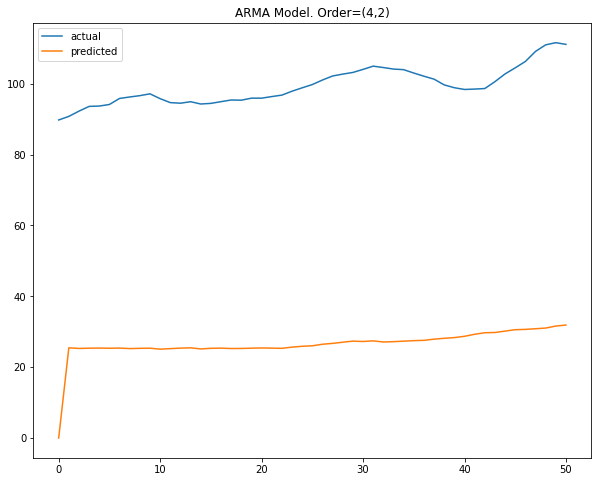

In [43]:
#actual vs pred
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

In [44]:
#forecasts
forecast1 = m1.forecast(len(test))
forecast1

1989-07-01     89.792155
1989-10-01     91.439147
1990-01-01     92.857057
1990-04-01     94.330168
1990-07-01     95.594293
1990-10-01     96.874026
1991-01-01     97.995063
1991-04-01     99.115793
1991-07-01    100.106825
1991-10-01    101.088505
1992-01-01    101.964449
1992-04-01    102.824818
1992-07-01    103.598442
1992-10-01    104.352969
1993-01-01    105.035822
1993-04-01    105.697853
1993-07-01    106.300289
1993-10-01    106.881409
1994-01-01    107.412680
1994-04-01    107.922962
1994-07-01    108.391309
1994-10-01    108.839525
1995-01-01    109.252281
1995-04-01    109.646083
1995-07-01    110.009754
1995-10-01    110.355825
1996-01-01    110.676181
1996-04-01    110.980363
1996-07-01    111.262514
1996-10-01    111.529920
1997-01-01    111.778384
1997-04-01    112.013492
1997-07-01    112.232264
1997-10-01    112.438999
1998-01-01    112.631606
1998-04-01    112.813410
1998-07-01    112.982966
1998-10-01    113.142858
1999-01-01    113.292110
1999-04-01    113.432742


FCST RMSE: 9.441664502960908


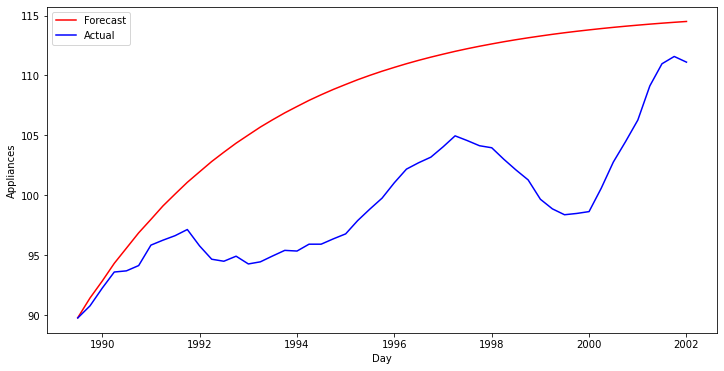

In [45]:
#actual vs forecasts
plt.figure(figsize=(12,6))
plt.plot(forecast1, 'r', label = 'Forecast')
plt.plot(test, 'b', label='Actual')
plt.xlabel('Day')
plt.ylabel('Appliances')
plt.legend()

mse_F = mean_squared_error(test,forecast1)
print('FCST RMSE: ' + str(np.sqrt(mse_F) ))

### SARIMA

#### STATIONARITY FOR SARIMA

In [46]:
stationarity(d_seasonal)

'Data is Stationary, Proceed to model building.'

#### ACF / PACF FOR SARIMA

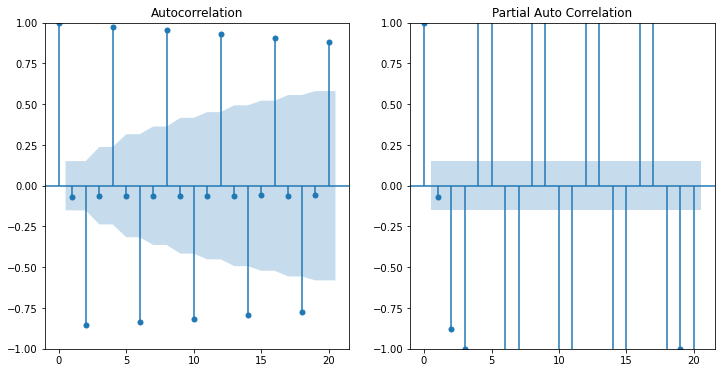

In [47]:
ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))

plot_acf(d_seasonal, lags=20, ax=ax[0]);
plt.title("Auto Correlation")

plot_pacf(d_seasonal, lags=20, ax=ax[1]);
plt.title("Partial Auto Correlation")

plt.show()

In [48]:
#P = [0 - 23]
#Q = [0 - 11]

#### HYPERPARAMETERS TUNING FOR SARIMA

In [49]:
p_val = []
q_val = []
P_val = []
Q_val = []
mse_val = []
rmse_val = []
def SARIMA_checkmodel(p,q,P,Q):
    P_val.append(P)
    Q_val.append(Q)
    p_val.append(p)
    q_val.append(q)
    model = SARIMAX(train, order=(p,1,q), seasonal_order=(P,1,Q,4)).fit()
    f1=model.forecast(len(test))
    actual = []; pred = []
    for m in range(len(f1)):
        actual.append(test[m])
        pred.append(f1[m])
    df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
    mse = mean_squared_error(df_res.actual,df_res.predicted)
    rmse = np.sqrt(mse)
    mse_val.append(mse)
    rmse_val.append(rmse)
    

In [50]:
P = [0,1,2,3]
Q = [0,1,2]
p = [0,1,2,3]
q = [0,1,2]

In [51]:
for i in p:
    for j in q:
        for k in P:
            for l in Q:
                SARIMA_checkmodel(i,j,k,l)

In [52]:
df_eval = pd.DataFrame({'p':p_val,'q':q_val,'P':P_val,'Q':Q_val,'rmse':rmse_val})

In [53]:
df_eval.sort_values(by='rmse',ascending=True)

,p,q,P,Q,rmse
7,0,0,2,1,3.729135
10,0,0,3,1,4.691897
11,0,0,3,2,4.797536
9,0,0,3,0,5.186621
6,0,0,2,0,5.376136
...,...,...,...,...,...
84,2,1,0,0,57.392990
75,2,0,1,0,57.447409
63,1,2,1,0,58.597621
51,1,1,1,0,60.214230


In [54]:
p = 3
d = 1
q = 2
P = 4
D = 0
Q = 6

In [55]:
#building the model
sm1 = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,4)).fit()

In [56]:
sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             SARIMAX Results                                              
==========================================================================================================
Dep. Variable:                                                  y   No. Observations:                  118
Model:             SARIMAX(3, 1, 2)x(4, 0, [1, 2, 3, 4, 5, 6], 4)   Log Likelihood                 -42.780
Date:                                            Tue, 11 Oct 2022   AIC                            117.560
Time:                                                    11:31:20   BIC                            161.755
Sample:                                                01-01-1960   HQIC                           135.502
                                                     - 04-01-1989                                         
Covariance Type:                                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1898      0.354      3.365      0.001       0.497       1.883
ar.L2         -0.7770      0.507     -1.531      0.126      -1.772       0.218
ar.L3          0.3748      0.298      1.259      0.208      -0.209       0.958
ma.L1         -0.3250      0.337     -0.964      0.335      -0.986       0.336
ma.L2          0.6275      0.326      1.922      0.055      -0.012       1.267
ar.S.L4        0.3155      0.519      0.608      0.543      -0.702       1.333
ar.S.L8       -0.1093      0.491     -0.222      0.824      -1.072       0.854
ar.S.L12       0.0820      0.412      0.199      0.842      -0.725       0.889
ar.S.L16       0.6496      0.554      1.172      0.241      -0.437       1.736
ma.S.L4        0.3154      1.542      0.205      0.838      -2.707       3.338
ma.S.L8        0.0959     25.110      0.004      0.997     -49.120      49.312
ma.S.L12      -0.0054     12.997     -0.000      1.000     -25.479      25.469
ma.S.L16      -0.6538     20.904     -0.031      0.975     -41.625      40.318
ma.S.L20      -0.5731     14.574     -0.039      0.969     -29.138      27.992
ma.S.L24       0.1195      2.947      0.041      0.968      -5.657       5.896
sigma2         0.1097      2.783      0.039      0.969      -5.345       5.564
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                31.62
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              20.79   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
#forecasts
forecast2 = sm1.forecast(len(test))
forecast2

1989-07-01     89.616010
1989-10-01     91.109572
1990-01-01     92.550827
1990-04-01     94.326398
1990-07-01     95.850133
1990-10-01     97.124089
1991-01-01     98.283084
1991-04-01     99.302466
1991-07-01    100.346059
1991-10-01    101.136805
1992-01-01    102.050905
1992-04-01    102.765362
1992-07-01    103.157373
1992-10-01    103.367919
1993-01-01    103.577607
1993-04-01    103.757928
1993-07-01    103.949911
1993-10-01    104.304153
1994-01-01    104.958840
1994-04-01    105.458019
1994-07-01    105.983050
1994-10-01    106.407155
1995-01-01    106.894401
1995-04-01    107.459019
1995-07-01    108.108771
1995-10-01    108.585666
1996-01-01    109.150496
1996-04-01    109.639323
1996-07-01    109.965943
1996-10-01    110.167339
1997-01-01    110.429082
1997-04-01    110.635473
1997-07-01    110.798275
1997-10-01    111.044995
1998-01-01    111.508066
1998-04-01    111.872062
1998-07-01    112.267137
1998-10-01    112.625371
1999-01-01    113.095952
1999-04-01    113.587381


RMSE: 8.957260947967386


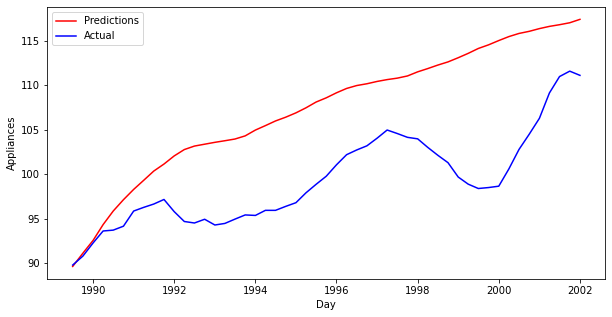

In [58]:
#actual vs forecasts
plt.figure(figsize=(10,5))
plt.plot(forecast2, 'r', label = 'Predictions')
plt.plot(test, 'b', label='Actual')
plt.xlabel('Day')
plt.ylabel('Appliances')
plt.legend()

mse1 = mean_squared_error(test,forecast2)
print('RMSE: ' + str(np.sqrt(mse1) ))

### SARIMAX

In [59]:
# correlation chart
df.corr().style.background_gradient(cmap="gist_gray_r")

,m3,ppi,cpi,gdp,m1nsa,ddnsa,lnppi,dppi,dlnppi,lppi,trend
m3,1.000000,0.908680,0.965519,0.973118,0.952169,0.859869,0.851775,-0.139791,-0.286648,0.912245,0.938218
ppi,0.908680,1.000000,0.978875,0.945554,0.938540,0.932022,0.988590,0.010486,-0.166041,0.999535,0.974382
cpi,0.965519,0.978875,1.000000,0.982431,0.983137,0.941614,0.943322,-0.066371,-0.231425,0.980587,0.984004
gdp,0.973118,0.945554,0.982431,1.000000,0.969191,0.938475,0.912259,-0.035154,-0.169153,0.945939,0.986910
m1nsa,0.952169,0.938540,0.983137,0.969191,1.000000,0.949034,0.891667,-0.083434,-0.240096,0.940512,0.962064
ddnsa,0.859869,0.932022,0.941614,0.938475,0.949034,1.000000,0.921963,0.039020,-0.091235,0.930003,0.959279
lnppi,0.851775,0.988590,0.943322,0.912259,0.891667,0.921963,1.000000,0.068175,-0.093604,0.986311,0.958876
dppi,-0.139791,0.010486,-0.066371,-0.035154,-0.083434,0.039020,0.068175,1.000000,0.906529,-0.019996,-0.006362
dlnppi,-0.286648,-0.166041,-0.231425,-0.169153,-0.240096,-0.091235,-0.093604,0.906529,1.000000,-0.193649,-0.143578
lppi,0.912245,0.999535,0.980587,0.945939,0.940512,0.930003,0.986311,-0.019996,-0.193649,1.000000,0.974614


In [60]:
#splitting the data
ss = int(0.70 * len(df))

train_df = df.iloc[:ss]
test_df = df.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 118, test = 51


In [61]:
exog_train = train_df[['m3','cpi','gdp','m1nsa','ddnsa']]
exog_test = test_df[['m3','cpi','gdp','m1nsa','ddnsa']]

In [62]:
p = 3
d = 1
q = 2
P = 4
D = 0
Q = 4

In [63]:
#building the model
sm2 = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,4), exog = exog_train.values).fit()

In [64]:
sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                                            y   No. Observations:                  118
Model:             SARIMAX(3, 1, 2)x(4, 0, [1, 2, 3, 4], 4)   Log Likelihood                 -58.605
Date:                                      Tue, 11 Oct 2022   AIC                            155.211
Time:                                              11:31:21   BIC                            207.692
Sample:                                          01-01-1960   HQIC                           176.517
                                               - 04-01-1989                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0005      0.001     -0.451      0.652      -0.002       0.002
x2             0.5804      0.164      3.546      0.000       0.260       0.901
x3         -3.205e-05      0.001     -0.026      0.979      -0.002       0.002
x4            -0.0038      0.019     -0.204      0.838      -0.040       0.033
x5            -0.0106      0.024     -0.450      0.653      -0.057       0.036
ar.L1         -0.1288      1.779     -0.072      0.942      -3.616       3.358
ar.L2          0.1970      1.365      0.144      0.885      -2.478       2.872
ar.L3          0.2635      1.305      0.202      0.840      -2.294       2.821
ma.L1          0.9460      1.792      0.528      0.598      -2.566       4.458
ma.L2          0.4758      1.765      0.270      0.787      -2.983       3.934
ar.S.L4       -0.1981      2.249     -0.088      0.930      -4.606       4.210
ar.S.L8        0.1610      4.039      0.040      0.968      -7.755       8.077
ar.S.L12      -0.0659      2.682     -0.025      0.980      -5.322       5.190
ar.S.L16      -0.0685      2.207     -0.031      0.975      -4.394       4.258
ma.S.L4        0.2723      2.177      0.125      0.900      -3.994       4.539
ma.S.L8       -0.2037      4.145     -0.049      0.961      -8.328       7.920
ma.S.L12       0.0156      2.780      0.006      0.996      -5.433       5.464
ma.S.L16       0.1511      2.228      0.068      0.946      -4.215       4.518
sigma2         0.1819      0.028      6.431      0.000       0.126       0.237
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                93.46
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              18.56   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
#forecasts
forecast3 = sm2.forecast(len(test_df), exog=exog_test.values)
forecast3

1989-07-01     89.196340
1989-10-01     90.010873
1990-01-01     91.258460
1990-04-01     92.038705
1990-07-01     92.965060
1990-10-01     93.723617
1991-01-01     94.194391
1991-04-01     94.285046
1991-07-01     94.601876
1991-10-01     94.753294
1992-01-01     95.013296
1992-04-01     95.287604
1992-07-01     95.527277
1992-10-01     95.489006
1993-01-01     95.974296
1993-04-01     96.124584
1993-07-01     96.116950
1993-10-01     96.111460
1994-01-01     96.594590
1994-04-01     96.936037
1994-07-01     97.398313
1994-10-01     97.504500
1995-01-01     98.154219
1995-04-01     98.632793
1995-07-01     98.790314
1995-10-01     98.925384
1996-01-01     99.549932
1996-04-01     99.990135
1996-07-01    100.323647
1996-10-01    100.696979
1997-01-01    101.229837
1997-04-01    101.516517
1997-07-01    101.662764
1997-10-01    101.738409
1998-01-01    101.957279
1998-04-01    102.277568
1998-07-01    102.578366
1998-10-01    102.480258
1999-01-01    102.842467
1999-04-01    103.465452


RMSE: 2.530709815189037


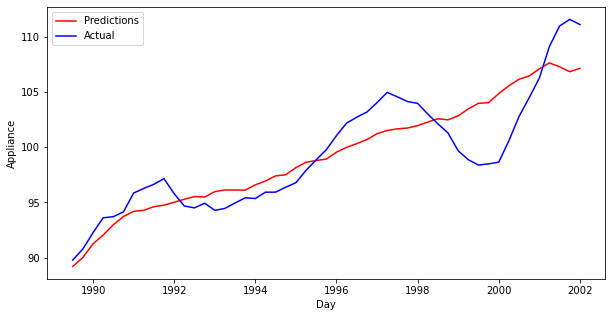

In [66]:
#forecasts vs actual
plt.figure(figsize=(10,5))
plt.plot(forecast3, 'r', label = 'Predictions')
plt.plot(test, 'b', label='Actual')
plt.xlabel('Day')
plt.ylabel('Appliance')
plt.legend()

mse1 = mean_squared_error(test,forecast3)
print('RMSE: ' + str(np.sqrt(mse1) ))

### ARIMAX

In [67]:
p=4; q=2
m2 = ARIMA(train, order=(p,1,q), exog = exog_train.values).fit()

In [68]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  118
Model:                 ARIMA(4, 1, 2)   Log Likelihood                 -64.277
Date:                Tue, 11 Oct 2022   AIC                            152.553
Time:                        11:31:22   BIC                            185.699
Sample:                    01-01-1960   HQIC                           166.010
                         - 04-01-1989                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.724e-05      0.001     -0.022      0.983      -0.002       0.002
x2             0.7207      0.151      4.788      0.000       0.426       1.016
x3            -0.0003      0.001     -0.273      0.785      -0.002       0.002
x4            -0.0037      0.013     -0.277      0.782      -0.030       0.022
x5            -0.0136      0.015     -0.930      0.352      -0.042       0.015
ar.L1         -0.0626      0.532     -0.118      0.906      -1.106       0.981
ar.L2         -0.0560      0.504     -0.111      0.912      -1.044       0.932
ar.L3          0.2628      0.379      0.694      0.488      -0.479       1.005
ar.L4          0.1526      0.177      0.862      0.389      -0.194       0.500
ma.L1          0.8174      0.536      1.526      0.127      -0.233       1.867
ma.L2          0.4229      0.491      0.861      0.389      -0.540       1.386
sigma2         0.1830      0.024      7.648      0.000       0.136       0.230
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               119.72
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):              19.72   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
#forecasts
forecast4 = m2.forecast(len(test_df), exog=exog_test.values)
forecast4

1989-07-01     89.173706
1989-10-01     90.001501
1990-01-01     91.357037
1990-04-01     92.191664
1990-07-01     93.373354
1990-10-01     94.365705
1991-01-01     95.123932
1991-04-01     95.434523
1991-07-01     95.888155
1991-10-01     96.099430
1992-01-01     96.377956
1992-04-01     96.652319
1992-07-01     96.949680
1992-10-01     96.895051
1993-01-01     97.529563
1993-04-01     97.718607
1993-07-01     97.675694
1993-10-01     97.661568
1994-01-01     98.180394
1994-04-01     98.566749
1994-07-01     99.132728
1994-10-01     99.280027
1995-01-01    100.088972
1995-04-01    100.718348
1995-07-01    100.920210
1995-10-01    101.102166
1996-01-01    101.880421
1996-04-01    102.424897
1996-07-01    102.847889
1996-10-01    103.356485
1997-01-01    104.037913
1997-04-01    104.396069
1997-07-01    104.634784
1997-10-01    104.824290
1998-01-01    105.149305
1998-04-01    105.584416
1998-07-01    106.011369
1998-10-01    106.006313
1999-01-01    106.490081
1999-04-01    107.289427


RMSE: 4.05603285940385


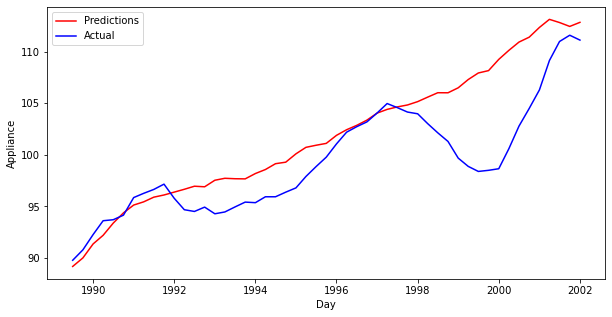

In [70]:
#forecasts vs actual
plt.figure(figsize=(10,5))
plt.plot(forecast4, 'r', label = 'Predictions')
plt.plot(test, 'b', label='Actual')
plt.xlabel('Day')
plt.ylabel('Appliance')
plt.legend()

mse1 = mean_squared_error(test,forecast4)
print('RMSE: ' + str(np.sqrt(mse1) ))

#### COMPARISSION

RMSE ARMA: 9.441664502960908
AIC ARMA:118.7225911416195 ;  BIC ARMA:138.05780868520378


RMSE SARIMA: 8.957260947967386
AIC SARIMA:117.55975943436425 ;  BIC SARIMA:161.75454239112835


RMSE SARIMAX: 2.530709815189037
AIC SARIMAX:155.21069937085014  ;  BIC SARIMAX:207.69200413200753


RMSE ARIMAX: 4.05603285940385
AIC ARIMAX:152.5531207263244  ;  BIC ARIMAX:185.69920794389748


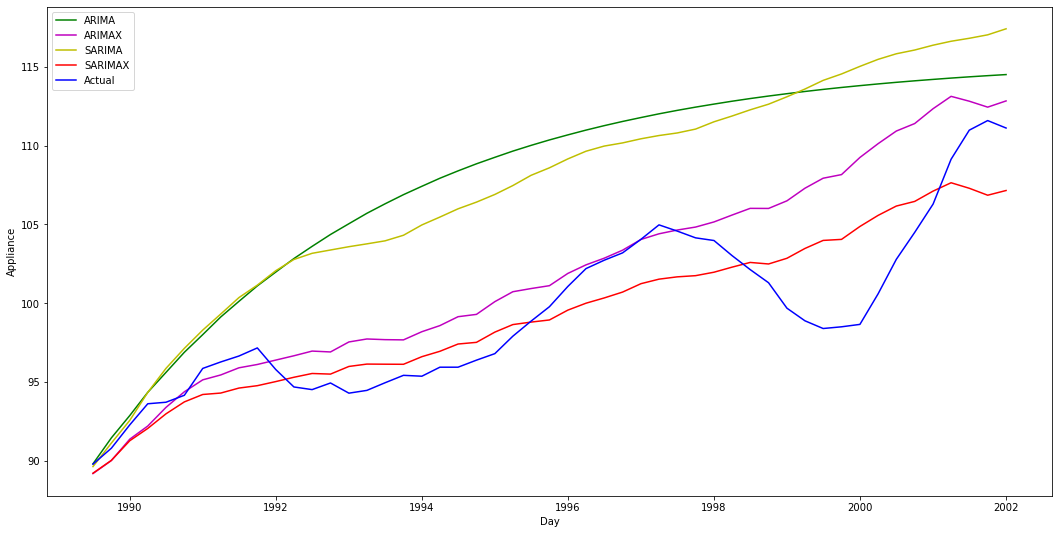

In [71]:
plt.figure(figsize=(18,9))
plt.plot(forecast1, 'g', label = 'ARIMA')
plt.plot(forecast4, 'm', label = 'ARIMAX')
plt.plot(forecast2, 'y', label = 'SARIMA')
plt.plot(forecast3, 'r', label = 'SARIMAX')
plt.plot(test, 'b', label='Actual')
plt.xlabel('Day')
plt.ylabel('Appliance')
plt.legend()

mse1 = mean_squared_error(test,forecast1)
print('RMSE ARMA: ' + str(np.sqrt(mse1) ))
aic1,bic1=m1.aic,m1.bic
print('AIC ARMA:{} ;  BIC ARMA:{}'.format(aic1,bic1))
print('\n')
mse2 = mean_squared_error(test,forecast2)
print('RMSE SARIMA: ' + str(np.sqrt(mse2) ))
aic2,bic2=sm1.aic,sm1.bic
print('AIC SARIMA:{} ;  BIC SARIMA:{}'.format(aic2,bic2))
print('\n')
mse3 = mean_squared_error(test,forecast3)
print('RMSE SARIMAX: ' + str(np.sqrt(mse3) ))
aic3,bic3=sm2.aic,sm2.bic
print('AIC SARIMAX:{}  ;  BIC SARIMAX:{}'.format(aic3,bic3))
print('\n')
mse4 = mean_squared_error(test,forecast4)
print('RMSE ARIMAX: ' + str(np.sqrt(mse4) ))
aic4,bic4=m2.aic,m2.bic
print('AIC ARIMAX:{}  ;  BIC ARIMAX:{}'.format(aic4,bic4))